Question 2:

For the first task we need to create a predictive model for binary response to predict a salary above or below $50K. For this I plan to create several models including, desicion tree, random forest, and a support vector machine. Then I plan to compare which of these three models has the best predictive capability

First I will create a model using a random forest model:

In [91]:
import pandas as pd
adult1 = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/adult.csv", index_col=False)

adult1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [92]:
#from the data above I have chosen a some columns I think will be useful for our model

target_column = ["age", "workclass", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "hours_per_week", "native_country", 'salary'
                ]
categorical_columns = [ "workclass", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "native_country", "salary"]


In [93]:
import pandas as pd

target_column = ["age", "workclass", "education_num", "marital_status", "occupation",\
                       "relationship", "race", "sex", "hours_per_week", "native_country", 'salary']

adult1 = adult1.loc[:, target_column]
adult1.head(2)

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K


In [94]:
features_categorical = [ "workclass", "education_num", "marital_status", "occupation",\
                        "relationship", "race", "sex","native_country", "salary"]
for c in features_categorical:
    adult1[c] = pd.Categorical(adult1[c]).codes

adult1.head(2)

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,salary
0,39,7,12,4,1,1,4,1,40,39,0
1,50,6,12,2,4,0,4,1,13,39,0


While it is not ideal to code data in a numerical way, this worked for me in the context of this data, while trying to dummy code the variables into a matrix was not working. In the future however it should be noted that this is not the correct way to code for categorical variables. 

Lets begin to visualize the data. One way to visualize the data is a correlation matrix, since we don't want our features to correlate, positively or negatively, with each other.

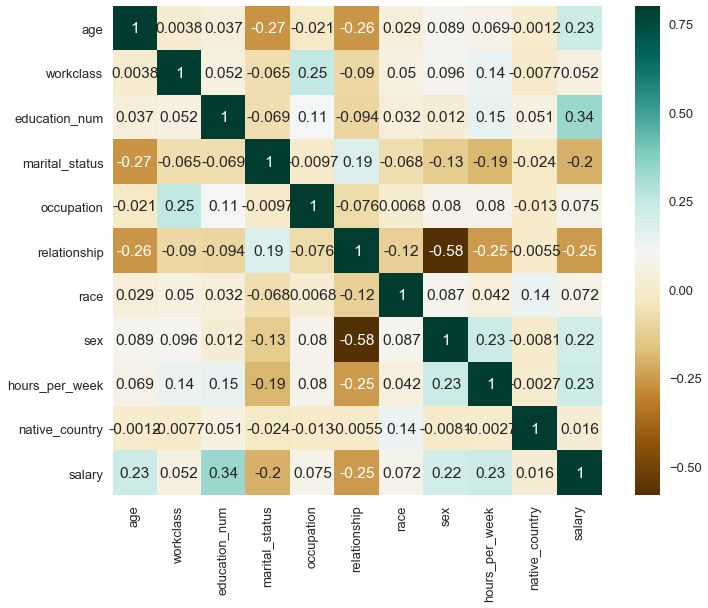

In [95]:
hmap = adult1.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(hmap, vmax=.8,annot=True,cmap="BrBG", square=True);

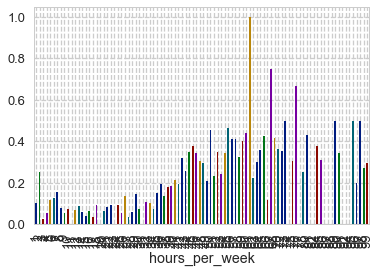

In [96]:
adult1.groupby('hours_per_week').salary.mean().plot(kind='bar')

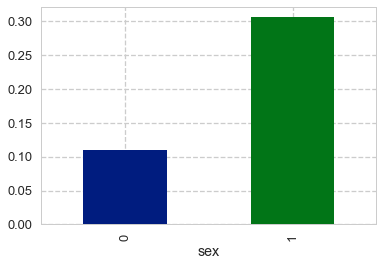

In [97]:
adult1.groupby('sex').salary.mean().plot(kind='bar')

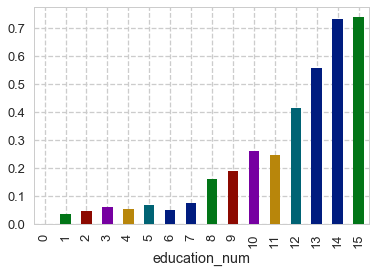

In [98]:
adult1.groupby('education_num').salary.mean().plot(kind='bar')

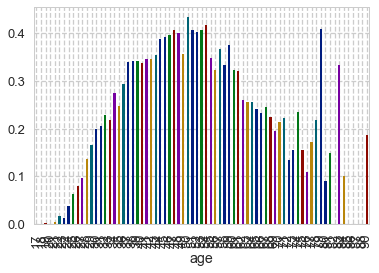

In [99]:
adult1.groupby('age').salary.mean().plot(kind='bar')

As we can see, just from a few of the features I have choosen to look at there seems to be some correlation between these variables and salary. So I think they will help make the model to predict salary. 

In [100]:
features = ["age", "workclass", "education_num", "marital_status", "occupation",\
            "relationship", "race", "sex", "hours_per_week", "native_country"]
response = 'salary'

In [101]:
import numpy as np
import math

X = adult1.iloc[0:32560,0:10].values
y = adult1.iloc[0:32560,10:11].values

In [102]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [131]:
from sklearn.ensemble import RandomForestClassifier
clf_RM = RandomForestClassifier(n_estimators = 100, criterion='entropy', random_state=0)
clf_RM.fit(X_train, y_train)

C:\Users\Dean\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [132]:
y_train_pred = clf_RM.predict(X_train)
y_test_pred = clf_RM.predict(X_test)

In [133]:
def success_ratio(cm):
    total = cm[0][0] + cm[1][0] + cm[0][1] + cm[1][1]
    return 100*(cm[0][0] + cm[1][1]) / total

In [134]:
import numpy as np
import pandas as pd
from matplotlib import cm
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print("Success ratio on training set : "+str(success_ratio(cm=cm_train))+"%")
print("Success ratio on test set : "+str(success_ratio(cm=cm_test))+"%")

Success ratio on training set : 97%
Success ratio on test set : 82%


Now we will create a single desicion tree

In [128]:
#Desicion Tree classification
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=1)

In [129]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [130]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)
y_pred_Tree = clf.predict(X_test)
predictions[:2]

array([0, 0], dtype=int8)

In [110]:
from sklearn.metrics import roc_auc_score

test_auc = roc_auc_score(y_test, y_pred_Tree)

print(test_auc)

0.6994479689867468


In [111]:
train_predictions = clf.predict(X_train)

train_auc = roc_auc_score(y_train, train_predictions)

print(train_auc)

0.9465818027560549


In [112]:
def get_aucs(max_depth):
    # Decision trees model with max_depth 
    clf = DecisionTreeClassifier(random_state=1, max_depth=max_depth)

    clf.fit(X_train, y_train)

    # Test AUC
    predictions = clf.predict(X_test)
    test_auc = roc_auc_score(y_test, predictions)

    # Train AUC
    predictions_train = clf.predict(X_train)
    train_auc = roc_auc_score(y_train, predictions_train)
    
    return test_auc, train_auc

depth_values = np.arange(2, 40)
auc_values = np.zeros((len(depth_values), 3))
for i, val in enumerate(depth_values):
    test_auc, train_auc = get_aucs(val)
    auc_values[i, 0]  = val
    auc_values[i, 1]  = test_auc
    auc_values[i, 2]  = train_auc

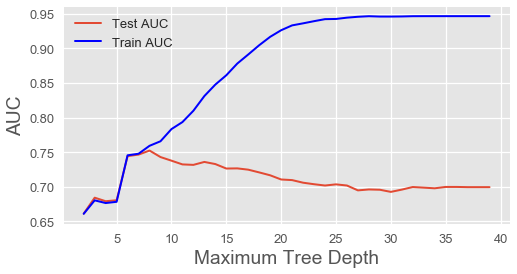

In [113]:
import matplotlib.pyplot as plt

%matplotlib inline 
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(8,4))
plt.plot(auc_values[:,0], auc_values[:,1], label='Test AUC') 
plt.plot(auc_values[:,0], auc_values[:,2], color='b', label='Train AUC')
plt.legend()
plt.xlabel('Maximum Tree Depth')
plt.ylabel('AUC')

plt.show()

From this figure we can see as the tree becomes deeper we begin to fit the training data very well, possibly overfitting the data. 
However if the tree is more shallow we don't fit the training data as well, but end up fitting the test data better. 

Next I will use the K-nearest neighbor model to see how it does at predicting income:

In [127]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=10, p=2, metric='minkowski')
knn.fit(X_train, y_train)
y_pred_KNN = knn.predict(X_test)

C:\Users\Dean\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


array([0, 0, 0, ..., 0, 1, 0], dtype=int8)

Now I will create a support vector machine for our predictions:

In [115]:
from sklearn.svm import SVC

clf_SVM = SVC()

clf_SVM.fit(X_train, y_train)

y_pred_SVM = clf_SVM.predict(X_test)

C:\Users\Dean\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Naive-Bayes:

In [116]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
clf_NB = BernoulliNB()
clf_NB.fit(X_train, y_train)
y_pred_NB = clf_NB.predict(X_test)

C:\Users\Dean\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logestic Regression:

In [117]:
from sklearn.linear_model import LogisticRegression
clf_Log = LogisticRegression(solver='liblinear', max_iter=1000, 
                             random_state=42,verbose=2,class_weight='balanced')

clf_Log.fit(X_train, y_train)
y_pred_Log = clf_Log.predict(X_test)

C:\Users\Dean\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibLinear]

Neural Network:

In [118]:
from sklearn.neural_network import MLPClassifier
MLPClassifier(activation='relu', alpha=1e-05,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(64), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       tol=0.001, validation_fraction=0.1, verbose=True,
       warm_start=False)
clf_MLP = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(64))

clf_MLP.fit(X_train, y_train)
y_pred_NN = clf_MLP.predict(X_test)

C:\Users\Dean\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Lets compare the models created:

In [140]:
from sklearn.metrics import accuracy_score
print('       Accuracy of Models       ')
print('--------------------------------')
print('KNN                     '+"{:.2f}".format(accuracy_score(y_test, y_pred_KNN)*100)+'%')
print('Support Vector Machine  '+"{:.2f}".format(accuracy_score(y_test, y_pred_SVM)*100)+'%')
print('Desicion Tree           '+"{:.2f}".format(accuracy_score(y_test, y_pred_Tree)*100)+'%')
print("Random forest           "+"{:.2f}".format(accuracy_score(y_test, y_test_pred)*100)+'%')
print('Naive-Baye              '+"{:.2f}".format(accuracy_score(y_test, y_pred_NB)*100)+'%')
print('Logestic Regression     '+"{:.2f}".format(accuracy_score(y_test, y_pred_Log)*100)+'%')
print('Neural Network          '+"{:.2f}".format(accuracy_score(y_test, y_pred_NN)*100)+'%')

       Accuracy of Models       
--------------------------------
KNN                     80.41%
Support Vector Machine  81.19%
Desicion Tree           78.13%
Random forest           82.05%
Naive-Baye              71.97%
Logestic Regression     73.65%
Neural Network          82.26%


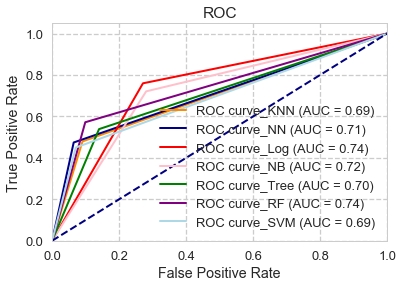

In [148]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1.0,
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})


fpr, tpr, _ = roc_curve(y_test, y_pred_KNN)
roc_auc = auc(fpr, tpr)
fpr2, tpr2, _ = roc_curve(y_test, y_pred_NN)
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, _ = roc_curve(y_test, y_pred_Log)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, _ = roc_curve(y_test, y_pred_NB)
roc_auc4 = auc(fpr4, tpr4)
fpr5, tpr5, _ = roc_curve(y_test, y_pred_Tree)
roc_auc5 = auc(fpr5, tpr5)
fpr6, tpr6, _ = roc_curve(y_test, y_test_pred)
roc_auc6 = auc(fpr6, tpr6)
fpr7, tpr7, _ = roc_curve(y_test, y_pred_SVM)
roc_auc7 = auc(fpr7, tpr7)
lw = 2
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve_KNN (AUC = %0.2f)' % roc_auc)
plt.plot(fpr2, tpr2, color='darkblue',
         lw=lw, label='ROC curve_NN (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='red',
         lw=lw, label='ROC curve_Log (AUC = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, color='pink',
         lw=lw, label='ROC curve_NB (AUC = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, color='green',
         lw=lw, label='ROC curve_Tree (AUC = %0.2f)' % roc_auc5)
plt.plot(fpr6, tpr6, color='purple',
         lw=lw, label='ROC curve_RF (AUC = %0.2f)' % roc_auc6)
plt.plot(fpr7, tpr7, color='lightblue',
         lw=lw, label='ROC curve_SVM (AUC = %0.2f)' % roc_auc7)


plt.plot()
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

From this table it seems a few of the models are close in accuracy, random forest, KNN, suport vector, and neural network all scoring above 80% accuracy. Of these however it seems a neural network has a slightly better accuacry rate than the other models. When we analyze the ROC curve plot we see that the random forest model and logestic regression have the highest AUC. From these two figures I think the conlcusion is a random forest model is the best model for this data set with the selected features. 

Question 3:

For our next task we have been asked to predict which customers are most likely to purchases insurance based on a training data with 86 variables. From this unknown data set we are to predict the top 50, of 1064, most likely to buy insurance. 

In [152]:
import pandas as pd
Caravan_train = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/Caravan_train.csv")
Caravan_train.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
2,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No
3,39,2,3,2,9,2,2,0,5,7,...,0,0,0,0,0,0,0,0,0,No
4,33,1,2,4,8,0,1,3,6,6,...,0,0,0,0,0,0,0,0,0,No


In [153]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import StratifiedShuffleSplit
%matplotlib inline

In [154]:
features_categorical = ['Purchase']
for c in features_categorical:
    Caravan_train[c] = pd.Categorical(Caravan_train[c]).codes

Caravan_train.head(2)

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0


In [172]:
import numpy as np
import math

X = Caravan_train.iloc[0:4629,0:85].values
y = Caravan_train.iloc[0:4629,85:86].values

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [173]:
Caravan_unk = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/Caravan_unk.csv")
Caravan_unk.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,41,1,3,3,10,0,7,0,3,8,...,0,0,0,0,1,0,1,0,0,0
1,38,1,3,2,9,0,6,0,3,5,...,0,0,0,0,0,0,0,0,0,0
2,1,1,4,3,1,1,5,1,3,6,...,0,0,0,0,1,0,0,0,0,0
3,38,1,3,2,9,2,2,2,4,7,...,0,0,0,1,0,0,0,0,0,0
4,35,1,2,3,8,1,5,1,3,5,...,0,0,0,0,1,0,0,0,0,0


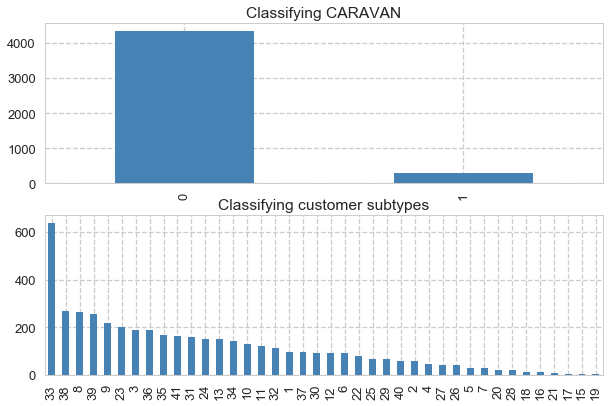

In [174]:
fig = plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
Caravan_train['Purchase'].value_counts().plot(kind='bar', title='Classifying CARAVAN', color='steelblue', grid=True)

plt.subplot(3,1,2)
Caravan_train['MOSTYPE'].value_counts().plot(kind='bar', align='center', title='Classifying customer subtypes', color='steelblue', grid=True)

As we can see from these plots we have very skewed data, not many people buy insurance, but many do not. 

In [175]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

In [176]:
clf_RF = clf.fit(X_train, y_train)
score = clf_RF.score(X_train, y_train)
"Mean accuracy of Random Forest: {0}".format(score)

C:\Users\Dean\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


'Mean accuracy of Random Forest: 0.992978665947'

In [178]:
pred_RF = clf_RF.predict(X_test)
from sklearn.metrics import accuracy_score
print ("Accuracy = %.2f" % (accuracy_score(y_test, pred_RF)))

Accuracy = 0.93


From a random forest model we have a 93% accuracy rate, which is great, but since this is a heavily skewed data set this doesn't give us the entire picture. This mostly tells us we've created a model thats great at predicting customers that don't buy insurance. For a full picture of the model's ability to predict buying insurance lets take a look at the ROC curve. Lets also create a few other models and see how they compare:


In [183]:
from sklearn.linear_model import LogisticRegression
clf_Log = LogisticRegression(solver='liblinear', max_iter=1000, 
                             random_state=42,verbose=2,class_weight='balanced')

clf_Log.fit(X_train, y_train)
y_pred_Log = clf_Log.predict(X_test)

C:\Users\Dean\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibLinear]Accuracy = 0.70


In [185]:
from sklearn.neural_network import MLPClassifier
MLPClassifier(activation='relu', alpha=1e-05,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(64), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       tol=0.001, validation_fraction=0.1, verbose=True,
       warm_start=False)
clf_MLP = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(64))

clf_MLP.fit(X_train, y_train)
y_pred_NN = clf_MLP.predict(X_test)

C:\Users\Dean\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [186]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
clf_NB = BernoulliNB()
clf_NB.fit(X_train, y_train)
y_pred_NB = clf_NB.predict(X_test)

C:\Users\Dean\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [187]:
from sklearn.svm import SVC

clf_SVM = SVC()

clf_SVM.fit(X_train, y_train)

y_pred_SVM = clf_SVM.predict(X_test)

C:\Users\Dean\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [188]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=10, p=2, metric='minkowski')
knn.fit(X_train, y_train)
y_pred_KNN = knn.predict(X_test)

C:\Users\Dean\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [189]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)
y_pred_Tree = clf.predict(X_test)
predictions[:2]

array([0, 0], dtype=int8)

In [191]:
from sklearn.metrics import accuracy_score
print('       Accuracy of Models       ')
print('--------------------------------')
print('KNN                     '+"{:.2f}".format(accuracy_score(y_test, y_pred_KNN)*100)+'%')
print('Support Vector Machine  '+"{:.2f}".format(accuracy_score(y_test, y_pred_SVM)*100)+'%')
print('Desicion Tree           '+"{:.2f}".format(accuracy_score(y_test, y_pred_Tree)*100)+'%')
print("Random forest           "+"{:.2f}".format(accuracy_score(y_test, pred_RF)*100)+'%')
print('Naive-Baye              '+"{:.2f}".format(accuracy_score(y_test, y_pred_NB)*100)+'%')
print('Logestic Regression     '+"{:.2f}".format(accuracy_score(y_test, y_pred_Log)*100)+'%')
print('Neural Network          '+"{:.2f}".format(accuracy_score(y_test, y_pred_NN)*100)+'%')

       Accuracy of Models       
--------------------------------
KNN                     93.95%
Support Vector Machine  93.95%
Desicion Tree           88.88%
Random forest           92.98%
Naive-Baye              88.12%
Logestic Regression     69.76%
Neural Network          93.30%


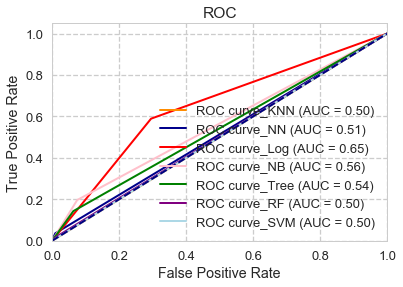

In [192]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1.0,
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})


fpr, tpr, _ = roc_curve(y_test, y_pred_KNN)
roc_auc = auc(fpr, tpr)
fpr2, tpr2, _ = roc_curve(y_test, y_pred_NN)
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, _ = roc_curve(y_test, y_pred_Log)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, _ = roc_curve(y_test, y_pred_NB)
roc_auc4 = auc(fpr4, tpr4)
fpr5, tpr5, _ = roc_curve(y_test, y_pred_Tree)
roc_auc5 = auc(fpr5, tpr5)
fpr6, tpr6, _ = roc_curve(y_test, pred_RF)
roc_auc6 = auc(fpr6, tpr6)
fpr7, tpr7, _ = roc_curve(y_test, y_pred_SVM)
roc_auc7 = auc(fpr7, tpr7)
lw = 2
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve_KNN (AUC = %0.2f)' % roc_auc)
plt.plot(fpr2, tpr2, color='darkblue',
         lw=lw, label='ROC curve_NN (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='red',
         lw=lw, label='ROC curve_Log (AUC = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, color='pink',
         lw=lw, label='ROC curve_NB (AUC = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, color='green',
         lw=lw, label='ROC curve_Tree (AUC = %0.2f)' % roc_auc5)
plt.plot(fpr6, tpr6, color='purple',
         lw=lw, label='ROC curve_RF (AUC = %0.2f)' % roc_auc6)
plt.plot(fpr7, tpr7, color='lightblue',
         lw=lw, label='ROC curve_SVM (AUC = %0.2f)' % roc_auc7)


plt.plot()
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Since the logestic regression has the best AUC I have choosen it to predict the probability of unknown customers to buy insurance.

In [243]:
X_unk = Caravan_unk.iloc[0:1064,0:85].values

y_Log = clf_Log.predict_proba(X_unk)

#for i in range(len(X_unk)):
#	print("X=%s, Predicted=%s" % (X_unk ,y_Log[i]))



In [223]:
import pandas
pbs=pandas.DataFrame(y_Log,columns=['a','b'])

In [238]:
pbss=pbs.sort_index(by='b',ascending=False)


C:\Users\Dean\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [242]:
pbss.iloc[0:49]

,a,b
30,0.002771,0.997229
738,0.023101,0.976899
389,0.030925,0.969075
651,0.081351,0.918649
739,0.081462,0.918538
765,0.082297,0.917703
640,0.082697,0.917303
354,0.088450,0.911550
557,0.090988,0.909012
471,0.097603,0.902397


The following is an ordered list of the customers most likely to buy insurance:

2, 19, 20, 25, 29, 30, 31, 32, 44, 56, 156, 217, 232, 254, 354, 372, 386, 389, 402, 403, 414, 420, 423, 439, 471, 482, 531, 557, 579, 602, 630, 640, 651, 693, 736, 739, 754, 765, 770, 835, 836, 849, 852, 920, 967, 986, 1004, 1042, 1045, 1059.